In [236]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io


In [251]:

f = scipy.io.loadmat('equiripple56.mat')
coef = f['Num']
coef = coef[0]
print(coef)

[ 5.88662243e-03 -3.08975814e-03  3.71410320e-03 -4.26579463e-03
  4.69098577e-03 -4.93248679e-03  4.92994209e-03 -4.62295200e-03
  3.95530025e-03 -2.87996708e-03  1.35671145e-03  6.39023737e-04
 -3.11599046e-03  6.06952655e-03 -9.47235979e-03  1.32835134e-02
 -1.74400038e-02  2.18627632e-02 -2.64567821e-02  3.11149326e-02
 -3.57230710e-02  4.01592074e-02 -4.43098175e-02  4.80453432e-02
 -5.12710078e-02  5.38837249e-02 -5.58063151e-02  5.69865249e-02
  9.42614918e-01  5.69865249e-02 -5.58063151e-02  5.38837249e-02
 -5.12710078e-02  4.80453432e-02 -4.43098175e-02  4.01592074e-02
 -3.57230710e-02  3.11149326e-02 -2.64567821e-02  2.18627632e-02
 -1.74400038e-02  1.32835134e-02 -9.47235979e-03  6.06952655e-03
 -3.11599046e-03  6.39023737e-04  1.35671145e-03 -2.87996708e-03
  3.95530025e-03 -4.62295200e-03  4.92994209e-03 -4.93248679e-03
  4.69098577e-03 -4.26579463e-03  3.71410320e-03 -3.08975814e-03
  5.88662243e-03]


(1000,) (1000,)


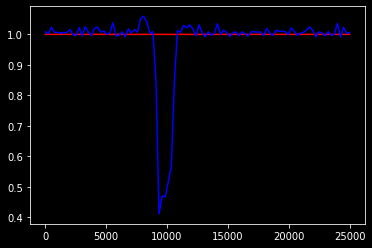

In [271]:
x = np.linspace(-1, 1, 1000)
y = np.sin(x*10)+0.5*np.sin(x*2)
yp = np.zeros(y.shape)

yp = np.convolve(y, coef, 'same')

print(y.shape, yp.shape)

ymax = []
ypmax = []
xi = np.linspace(20, 25000, 100)
for i in xi:
    y = np.sin(x*i/(2*np.pi))
    yp = np.convolve(y, coef, 'same')
    ymax.append(np.abs(y).max())
    ypmax.append(np.abs(yp).max())

plt.plot(xi, ymax, 'r', label='y')
plt.plot(xi, ypmax, 'b', label='yp')


In [3]:
def subsample(array, factor, method='mean'):
    """
    Subsample an array by a factor. Using the given method
    """
    if method == 'mean':
        return np.mean(array.reshape(-1, factor), axis=1)
    elif method == 'median':
        return np.median(array.reshape(-1, factor), axis=1)
    else:
        raise ValueError('Method not supported')


def nearestEvenDenominator(number, denominator):
    """
    Returns the nearest even denominator of the given number that produces no remainder
    """
    while number % denominator != 0:
        denominator -= 1
    return denominator

In [4]:
nearestEvenDenominator(2048, 100)

64

In [119]:
def noteA(x):
    """
    Returns the frequency of a note A
    """
    return 440 * 2**((x-69)/12)


M = 10
D = np.zeros(M)
ptr = 0

def delayline(x, ptr):
    y = D[ptr]
    D[ptr] = x
    ptr = (ptr + 1) % M

    return y, ptr


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.06342392 0.12659245 0.18925124
 0.25114799 0.31203345 0.37166246 0.42979491 0.48619674 0.54064082
 0.59290793 0.64278761 0.69007901 0.73459171 0.77614646 0.81457595
 0.84972543 0.88145336 0.909632   0.93414786 0.95490224 0.97181157
 0.98480775 0.99383846 0.99886734 0.99987413 0.99685478 0.98982144
 0.97880245 0.96384216 0.94500082 0.92235429 0.89599377 0.8660254
 0.83256985 0.79576184 0.75574957 0.71269417 0.666769   0.61815899
 0.56705986 0.51367739 0.45822652 0.40093054 0.34202014 0.28

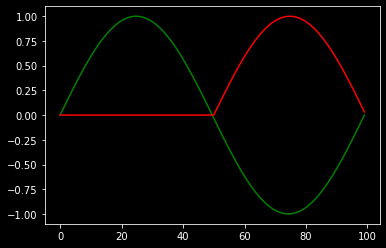

In [120]:
M = 50
D = np.zeros(M)
ptr = 0


x = np.sin(np.linspace(0, 2*np.pi, 100))
d = np.zeros(100)
for i in range(100):
    d[i], ptr = delayline(x[i], ptr)
plt.plot(x, c='g')
plt.plot(d, c='r')

print(d)

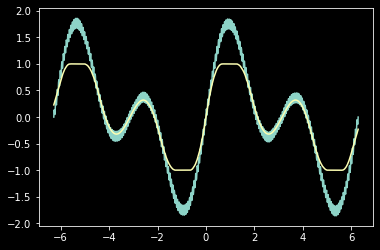

In [208]:
x = np.linspace(-2*np.pi, 2*np.pi, 1024)

sig = np.sin(x) + np.sin(x*2) + 0.1 * np.sin(x*100)

cut = np.where(np.abs(sig) < 1, sig, np.sign(sig))
N = int(0.05 * 1024)
a = np.array([1]*N)/N
conv = np.convolve(cut, a, mode='same')

plt.plot(x, sig)
plt.plot(x, conv)

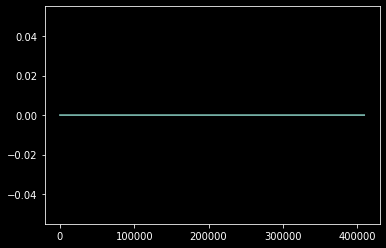

In [213]:
y = []
x = 0
for i in range(4096 * 100):
    v = np.sin(x/48000)
    y.append(v)
    x += v

plt.plot(y)

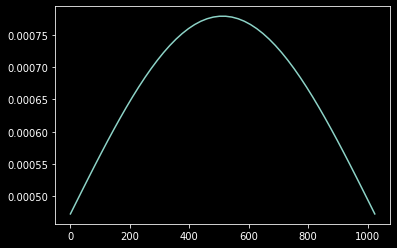

In [154]:
def norm(x, mean=0, std=1):
    return np.exp(-(x - mean)**2 / (2 * std**2)) / (std * np.sqrt(2 * np.pi))

x = np.linspace(0, 1024)
plt.plot(x, norm(x, x.mean(), 512))

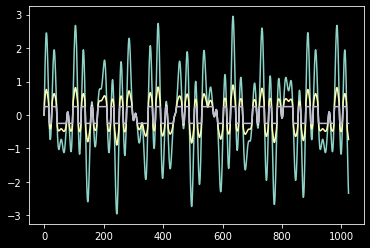

In [170]:
def exp_distort(v, ratio=0.3):
    """
    Exponential distortion function.

    Parameters
    ----------
    x : ndarray of sample positions
    rate : rate of distortion in samples

    Returns
    -------
    ndarray of values 0-1, for relative distortion
    """
    tanh = np.abs(np.tanh(v))
    return 1 - tanh*ratio

def clip(v, max=0.5):
    """
    Clips values to a maximum
    """
    return np.minimum(np.abs(v), max) * np.sign(v)

x = np.linspace(0, 1024, 1024)
sig = np.sin(x/5) + np.sin(x/4) + np.sin(x/14)

plt.plot(x, sig)
plt.plot(x, sig * exp_distort(sig, 0.7))
plt.plot(x, clip(sig, 0.25))

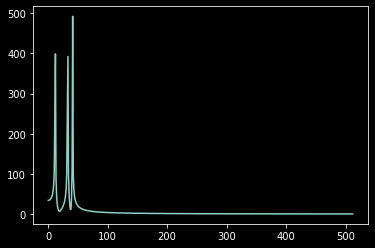

In [158]:
fft = np.fft.rfft(sig)
plt.plot(np.abs(fft))

<ipython-input-161-d226d54b65e4>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  a[k, p] = 1/np.sqrt(n) * np.sum(sig[p:p+n] * np.exp(-2j * np.pi * k * np.arange(n) / n))


(128, 897)


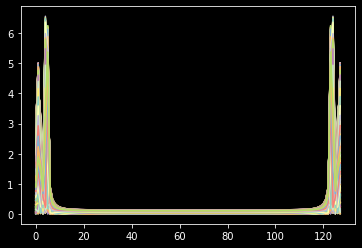

In [161]:
N = 1024
n = 128
a = np.zeros((n, N-n+1))
for k in range(n):
    for p in range(N-n+1):
        a[k, p] = 1/np.sqrt(n) * np.sum(sig[p:p+n] * np.exp(-2j * np.pi * k * np.arange(n) / n))

print(a.shape)
plt.plot(np.abs(a))

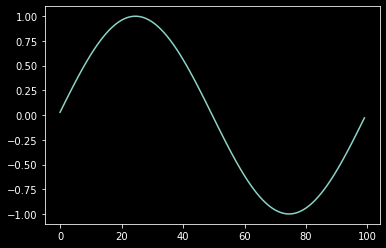

In [123]:
plt.plot(subsample(x, 10, 'mean'))
